## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../input/clean_train.csv")
test = pd.read_csv("../input/test.csv")
all_data = [train, test]

## Most popular embarkation port:

In [17]:
popularity = train["Embarked"].value_counts()
popularity

S    634
C    168
Q     77
Name: Embarked, dtype: int64

In [3]:
test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

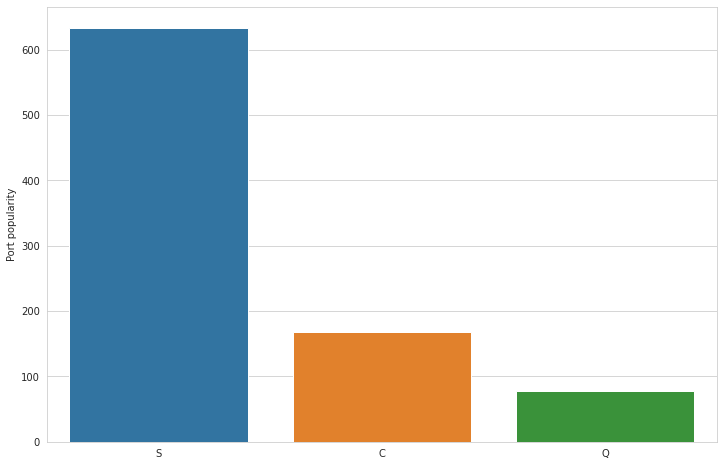

In [18]:
with sns.axes_style("whitegrid"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.barplot(x=popularity.index, y=popularity)
    g = g.set_ylabel("Port popularity")

## Plot survivors by Embarkation Port

In [6]:
train[["Embarked","Survived"]].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339117


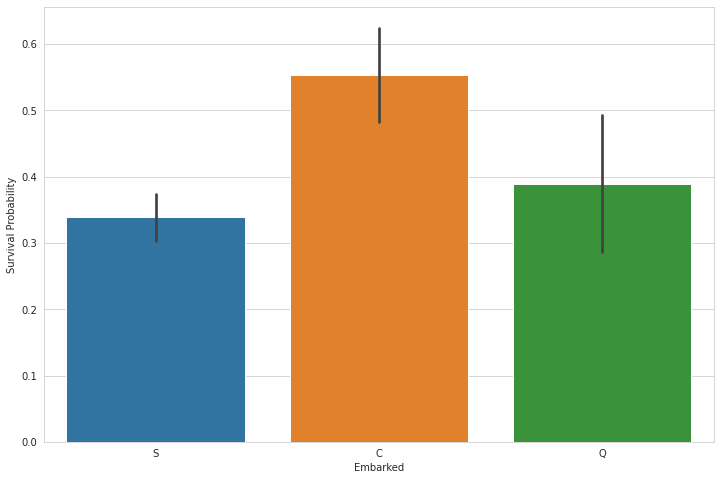

In [7]:
with sns.axes_style("whitegrid"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.barplot(x="Embarked", y="Survived", data=train)
    g = g.set_ylabel("Survival Probability")

## Embarkation port in relation with economic class

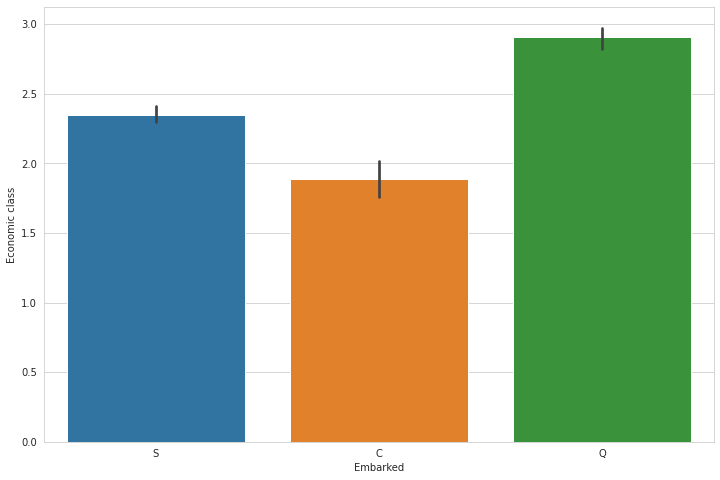

In [8]:
with sns.axes_style("whitegrid"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.barplot(x="Embarked", y="Pclass", data=train)
    g = g.set_ylabel("Economic class")

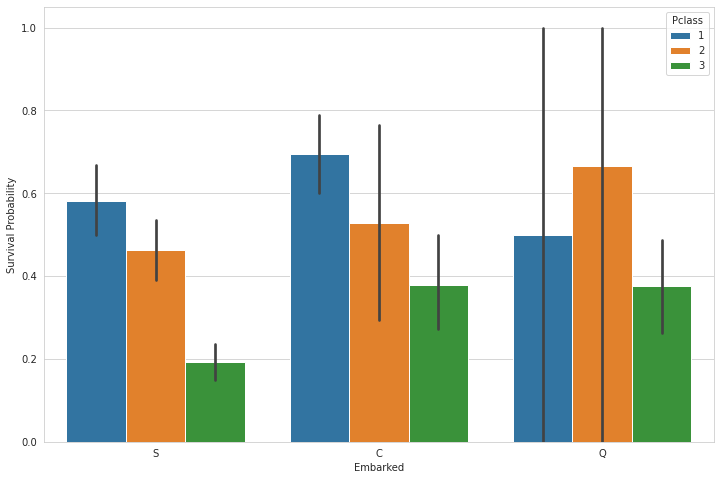

In [9]:
with sns.axes_style("whitegrid"):
    g = plt.subplots(figsize=(12, 8))
    g = sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=train)
    g = g.set_ylabel("Survival Probability")

## Export data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train["Embarked"].isnull().sum())
print(test["Embarked"].isnull().sum())

2
0


In [18]:
train["Embarked"].fillna("S", inplace=True)

In [22]:
train["Embarked"].to_csv("../input/train_values/embarked.csv", index=False)

## Correlation with other variables

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
train["Embarked"] = encoder.fit_transform(train["Embarked"])
encoder.classes_

array(['C', 'Q', 'S', nan], dtype=object)

In [12]:
train["Sex"] = encoder.fit_transform(train["Sex"])
encoder.classes_

array(['female', 'male'], dtype=object)

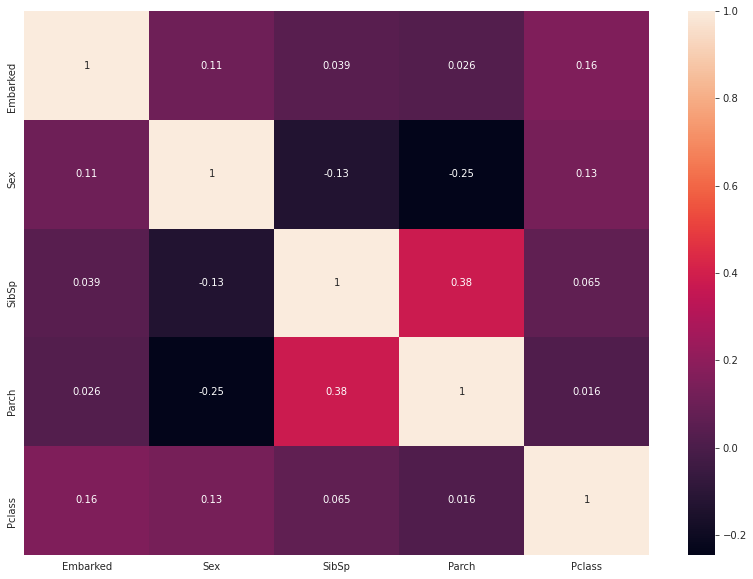

In [13]:
corr = train[["Embarked","Sex","SibSp","Parch","Pclass"]].corr()
with sns.axes_style("whitegrid"):
    g = plt.subplots(figsize=(14, 10))
    g = sns.heatmap(corr, annot=True)

It seems Embarked has very little correlation but in fact the one charcateristic that is more correlated is Pclass. <br> <br>

Moreover, because I just realize that there actually just two null values in this feature I goining to just say they are from S (Southampton). LOL!!!!